In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('data.csv')
import csv
import random as rd
import csv
import copy
from collections import Counter

import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

In [3]:
# data,testdata= np.split(df,[int(0.80*len(df))])
X = df[df.columns[0:-1]]
Y = df[df.columns[-1]]

In [4]:
means = np.mean(X, axis = 0)
stdDev = np.std(X, axis = 0)
X = (X - means) / stdDev

In [5]:
class NeuralNetwork:
    def __init__(self, X, Y, hiddeninfo):
        self.n = len(hiddeninfo)
        self.inputlayersize  = X.shape[1]
        self.outputlayersize = X.shape[1]
        self.allweights = [1] *(self.n + 1)
        self.allactivations = [1] *(self.n+1 )
        self.allz = [1]*(self.n +1)
        
        self.allweights[0] =  np.random.rand(self.inputlayersize,hiddeninfo[0])
        
        for i in range (1,self.n+1):
            if i==self.n:
                weights= np.random.rand(hiddeninfo[self.n-1],self.outputlayersize)
            else:
                weights = np.random.rand(hiddeninfo[i-1],hiddeninfo[i])
            self.allweights[i]=weights 
    
    def forwardprop(self,X):       
        output = []
        self.allz[0] = np.dot(X,self.allweights[0])
        self.allactivations[0] = self.allz[0]
        
        for i in range(1, len(self.allweights)):
            self.allz[i] = np.dot(self.allactivations[i-1],self.allweights[i])
            self.allactivations[i] = self.allz[i]

        return self.allactivations[-1]
    
    def getreduceddimensions(self):
        return self.allactivations[0]
    
    def backprop(self,X,Y):

        deltas = [np.float128(1.0)] * len(self.allweights)
        dweights = [np.float128(1.0)] *len(self.allweights)
        
        deltas[-1] = - (Y - X) * 1.0;
        dweights[-1] = np.dot(self.allactivations[-2].T, deltas[-1])
        
#         print(self.allweights[0][0])
        i = len(self.allweights)-2
        while i>0:
            deltas[i] = np.dot(deltas[i+1],self.allweights[i+1].T)*1.0
            dweights[i] = np.dot(self.allactivations[i-1].T, deltas[i])
            i-=1
        
        deltas[0] =  np.dot(deltas[1],self.allweights[1].T)*1.0
        dweights[0] = np.dot(X.T, deltas[0])

        for i in range(len(self.allweights)):
            self.allweights[i] = self.allweights[i] - .0000000001 * dweights[i]
        
#         print (self.op)
#         print(dweights)


In [6]:
def error(y, op):
#     print("Actual: ", y)
#     print("Derived: ", op)
    return np.mean(np.mean((y-op)**2))

In [7]:
nn = NeuralNetwork(X,Y,[14])
ferrors=[]
errors=[]
for i in range(10):
    s = 0
    for i in range(12499):
        op = nn.forwardprop(X.iloc[s:s+2])
        outY= X.iloc[s:s+2]
#         print(error(outY,op))
        errors.append(error(outY,op))
        nn.backprop(op,outY)
        s+=2
    
    opall = nn.forwardprop(X)
    finalerror = error(X, opall)
    ferrors.append(finalerror)
    print(finalerror)

460.21352989413214
430.66150108020076
403.9343416819998
379.6817248874147
357.6061884061777
337.4538150497315
319.00677975689416
302.0773469313851
286.5030036700071
272.14248924300693


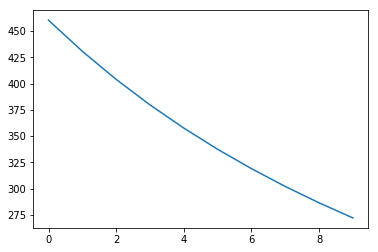

In [8]:
plt.plot(ferrors)
plt.show()

# K means

In [9]:
data = nn.getreduceddimensions()
reduceddf = pd.DataFrame(data=data[0:,0:])

In [10]:
inputdata = reduceddf
mean=np.mean(inputdata)
standarddev=np.std(inputdata)
for i in range(len(inputdata.columns)):
    inputdata[inputdata.columns[i]]= [(1.0 * (colum-mean[i]))/standarddev[i] for colum in inputdata[inputdata.columns[i]]]
    

In [11]:
inputdata = np.array(inputdata)
numoftrainingeg = inputdata.shape[0] 
numoffeatures =inputdata.shape[1] #number of features. Here n=2
k=5
random=rd.randint(0,numoftrainingeg-1)
centers= np.array(inputdata[random])

for i in range(4):
    random=rd.randint(0,numoftrainingeg-1)
    centers = np.vstack((centers,inputdata[random]))

In [12]:
error = 99999
distances = np.zeros((numoftrainingeg,k))

while error >= 0.001:
    for i in range(k):
        distances[:,i] = np.linalg.norm(inputdata - centers[i], axis=1)
    
    clusters = np.argmin(distances, axis = 1)
    
    centersold = deepcopy(centers)

    for i in range(k):
        centers[i] = np.mean(inputdata[clusters == i], axis=0)
    
    error = np.linalg.norm(centers - centersold)
    print(error)

3.296268205556365
1.2437328438686233
0.8965249946319287
0.3524409539858544
0.273689909457921
0.316382297702193
0.5886681245598708
0.6295341548268295
0.444897850563341
1.0755444887468524
0.6958908325769109
0.22148672308770873
0.0997069594711792
0.04760265222637386
0.022710532678081617
0.008405279057733094
0.002622637312191725
0.00151677297296521
0.0017250652851540386
0.00039713685490465203


In [13]:
def pre_dict(clusters, inputdata):
    predicted={}
    for i in range(len(clusters)):
        cl = clusters[i]
        if cl in predicted:
            predicted[cl].append(inputdata[i])
        else:
            predicted[cl]=[]
            predicted[cl].append(inputdata[i])
    
    purity=[]
    for cl in predicted:
        keys=[]
    
        for onelist in predicted[cl]:
            keys.append(onelist[14])
    
        c = Counter(keys)
        print(len(keys))
        value, count = c.most_common() [0]
        purity.append((value, (count/len(keys))))
    return purity

In [14]:
reduceddf = pd.DataFrame(inputdata)
reduceddf[29] = np.array(df[df.columns[-1]])

inputdata = np.array(reduceddf)
purity = pre_dict(clusters,inputdata)

6177
3666
6971
7517
667


In [15]:
averagekmeans=0
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averagekmeans+=purity[i][1]
averagekmeans/=len(purity)

normal 0.9333009551562247
dos 0.4866339334424441
dos 0.9736049347295941
normal 0.8802713848609818
probe 0.9145427286356822


# GMM

In [16]:
data = nn.getreduceddimensions()
reduceddf = pd.DataFrame(data=data[0:,0:])

In [17]:
inputdata = np.array(reduceddf)

GMM = GaussianMixture(n_components=5).fit(inputdata)
print('Successful!',GMM.converged_)

df_1 = pd.DataFrame(inputdata)
predictionvalues = GMM.predict(inputdata)

df_1[29] = np.array(df[df.columns[-1]])

inputdata = np.array(df_1)
purity = pre_dict(predictionvalues, inputdata)

Successful! True
10258
7003
6709
1020
8


In [18]:
averagegmm=0
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averagegmm+=purity[i][1]
averagegmm/=len(purity)

normal 0.9388769740690193
normal 0.4555190632586035
dos 0.9043076464450738
normal 0.5254901960784314
normal 0.875


# Heirarchical clustering

In [19]:
data = nn.getreduceddimensions()
reduceddf = pd.DataFrame(data=data[0:,0:])

In [20]:
inputdata = np.array(reduceddf)
hierClusters = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='single', memory=None, n_clusters=5, pooling_func='deprecated') 
hierClusters.fit(inputdata)
hierClusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
df_1 = pd.DataFrame(inputdata)
df_1[29] = np.array(df[df.columns[-1]])
inputdata = np.array(df_1)
averageh=0
purity = pre_dict(hierClusters.labels_, inputdata)
for i in range(len(purity)):
    print(purity[i][0], purity[i][1])
    averageh+=purity[i][1]
averageh/=len(purity)

24989
6
1
1
1
normal 0.5346352395053824
r2l 0.6666666666666666
normal 1.0
normal 1.0
probe 1.0


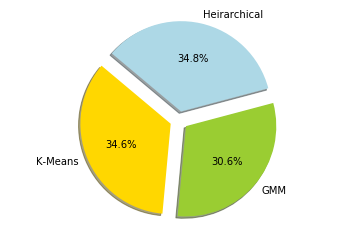

In [22]:
labels = 'K-Means', 'GMM', 'Heirarchical'
sizes = [averagekmeans, averagegmm,averageh]
colors = ['gold', 'yellowgreen', 'lightblue']
explode = (0.1, 0.1,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()